# ***Clustering Analysis - Ad Campaign Optimization***

In [1]:
# Import basic libraries for data handling and visualization
import pandas as pd         # For data manipulation and analysis
import numpy as np          # For numerical computations
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns       # For advanced statistical visualizations

# Ensure plots appear in the notebook
%matplotlib inline

# Load the CSV file (replace 'Dataset_Ads.csv' with the file path if needed)
df = pd.read_csv("Dataset_Ads.csv")

# Display the first few rows of the dataset to verify everything loaded correctly
df.head()

,Age,Gender,Income,Location,Ad Type,Ad Topic,Ad Placement,Clicks,Click Time,Conversion Rate,CTR
0,61,Male,35717.43,Urban,Banner,Travel,Social Media,3,2024-01-18 20:45:56.898459,0.0981,0.0737
1,41,Male,47453.25,Rural,Video,Travel,Search Engine,5,2023-04-24 20:45:56.898459,0.0937,0.0592
2,49,Female,68126.35,Rural,Text,Food,Social Media,4,2024-02-24 20:45:56.898459,0.1912,0.0563
3,68,Female,64585.73,Suburban,Text,Health,Website,6,2023-12-13 20:45:56.898459,0.1122,0.0232
4,63,Male,21109.40,Urban,Native,Fashion,Search Engine,5,2023-07-02 20:45:56.898459,0.1426,0.0539


In [2]:
# Check the dimensions (number of rows and columns)
print("Dataset shape:", df.shape)

# Display data types and non-null counts for each column
df.info()

# Generate and display summary statistics for numerical columns
df.describe()

Dataset shape: (10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Income           10000 non-null  float64
 3   Location         10000 non-null  object 
 4   Ad Type          10000 non-null  object 
 5   Ad Topic         10000 non-null  object 
 6   Ad Placement     10000 non-null  object 
 7   Clicks           10000 non-null  int64  
 8   Click Time       10000 non-null  object 
 9   Conversion Rate  10000 non-null  float64
 10  CTR              10000 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.5+ KB


,Age,Income,Clicks,Conversion Rate,CTR
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.235200,50080.040922,5.030600,0.202246,0.050425
std,14.790752,19935.832667,2.258046,0.121094,0.019821
min,-21.000000,-38932.640000,0.000000,0.001000,0.000000
25%,24.000000,36892.040000,3.000000,0.109500,0.037100
50%,34.000000,50122.520000,5.000000,0.180650,0.050300
75%,44.000000,63271.342500,6.000000,0.275100,0.063700
max,92.000000,126635.800000,17.000000,0.731700,0.127200


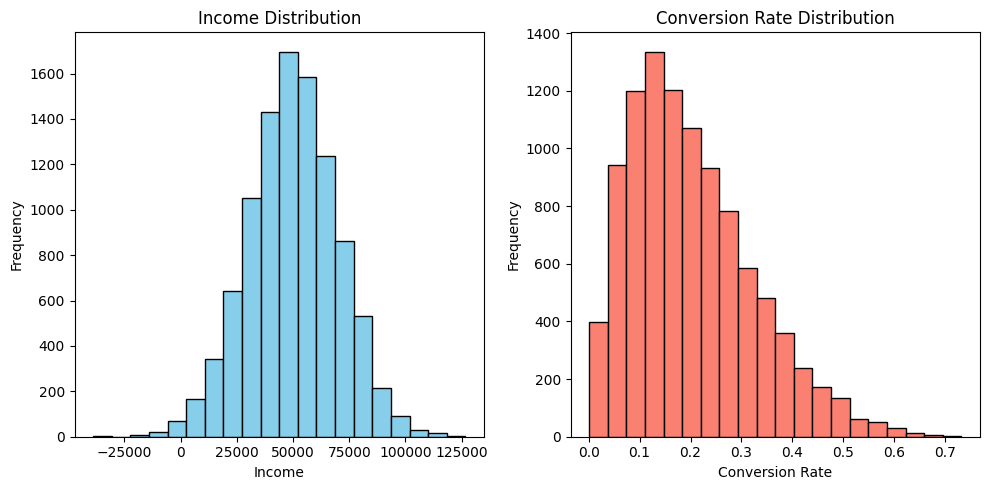

In [4]:
# Visualize distributions of one or two important numerical features
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(df['Income'], bins=20, color='skyblue', edgecolor='black')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df['Conversion Rate'], bins=20, color='salmon', edgecolor='black')
plt.title("Conversion Rate Distribution")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [7]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Step 1: Select relevant features for clustering
features = ['Income', 'Conversion Rate', 'Ad Type', 'Ad Topic', 'Ad Placement']

# Step 2: Separate numerical and categorical features
numerical_features = ['Income', 'Conversion Rate']
categorical_features = ['Ad Type', 'Ad Topic', 'Ad Placement']

# Step 3: Preprocess data (scaling numerical features, encoding categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply preprocessing to create feature matrix X
X = preprocessor.fit_transform(df[features])

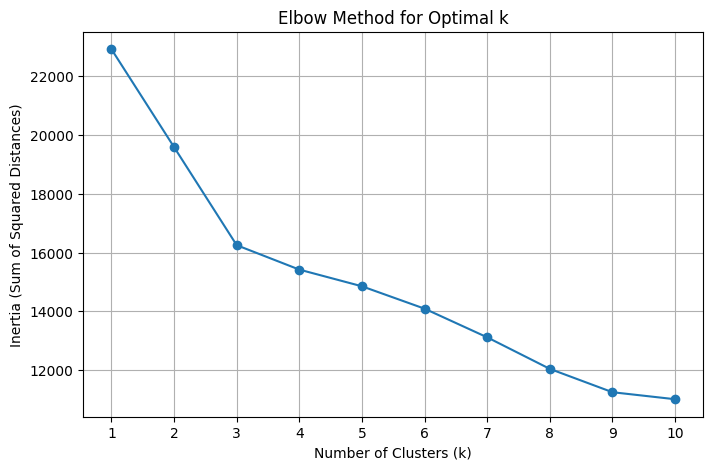

In [8]:
# Import the clustering library and plotting tools
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the preprocessed feature matrix X
# Step 1: Determine the optimal k using the Elbow Method.
inertia = []  # Inertia measures the sum of squared distances between samples and their closest cluster center.
for k in range(1, 11):  # Trying cluster counts from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve to visually inspect the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [9]:
# Step 2: Fit the K-Means model with the chosen number of clusters (for example, k=3)
optimal_k = 3  # Adjust this value based on your Elbow plot inspection
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Add the resulting cluster labels to your original DataFrame for further analysis
df['Cluster'] = kmeans.labels_

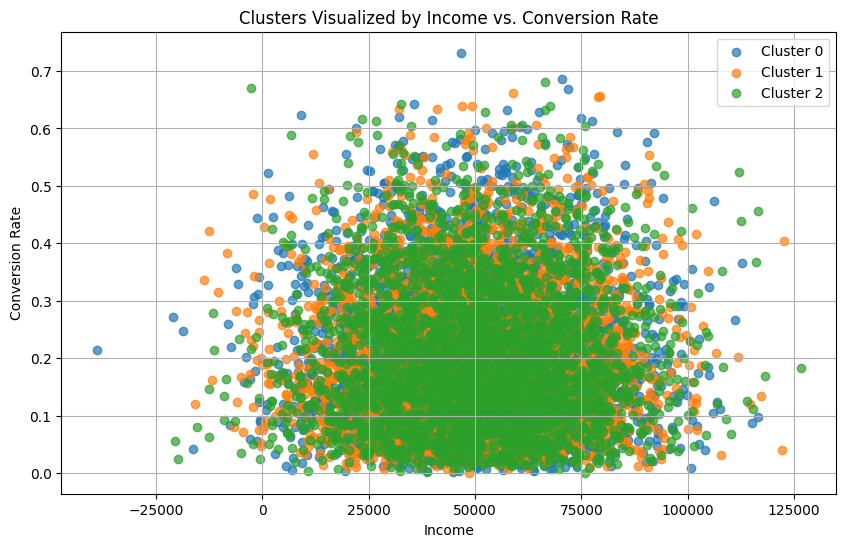

In [10]:
# Step 3: Visualize the resulting clusters.
# For visualization, we use two important features (e.g., 'Income' and 'Conversion Rate').
plt.figure(figsize=(10, 6))

# Loop over each cluster and plot the points
for cluster in range(optimal_k):
    # Here we use the original DataFrame columns to visualize, assuming they correspond to the first two features of X.
    cluster_indices = df['Cluster'] == cluster
    plt.scatter(df.loc[cluster_indices, 'Income'],
                df.loc[cluster_indices, 'Conversion Rate'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.title('Clusters Visualized by Income vs. Conversion Rate')
plt.xlabel('Income')
plt.ylabel('Conversion Rate')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Step 1: Examine cluster distribution
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Number of observations in each cluster:")
print(cluster_counts)

Number of observations in each cluster:
Cluster
0    3329
1    3331
2    3340
Name: count, dtype: int64


In [12]:
# Step 2: Compute mean values of key features by cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Income', 'Conversion Rate', 'CTR', 'Clicks']].mean()
print("Mean values for each cluster:")
print(cluster_summary)

Mean values for each cluster:
               Age        Income  Conversion Rate       CTR    Clicks
Cluster                                                              
0        34.124962  49561.388336         0.202371  0.050157  4.985281
1        34.522966  50045.072957         0.199627  0.050405  5.030321
2        34.058084  50631.859111         0.204733  0.050711  5.076048


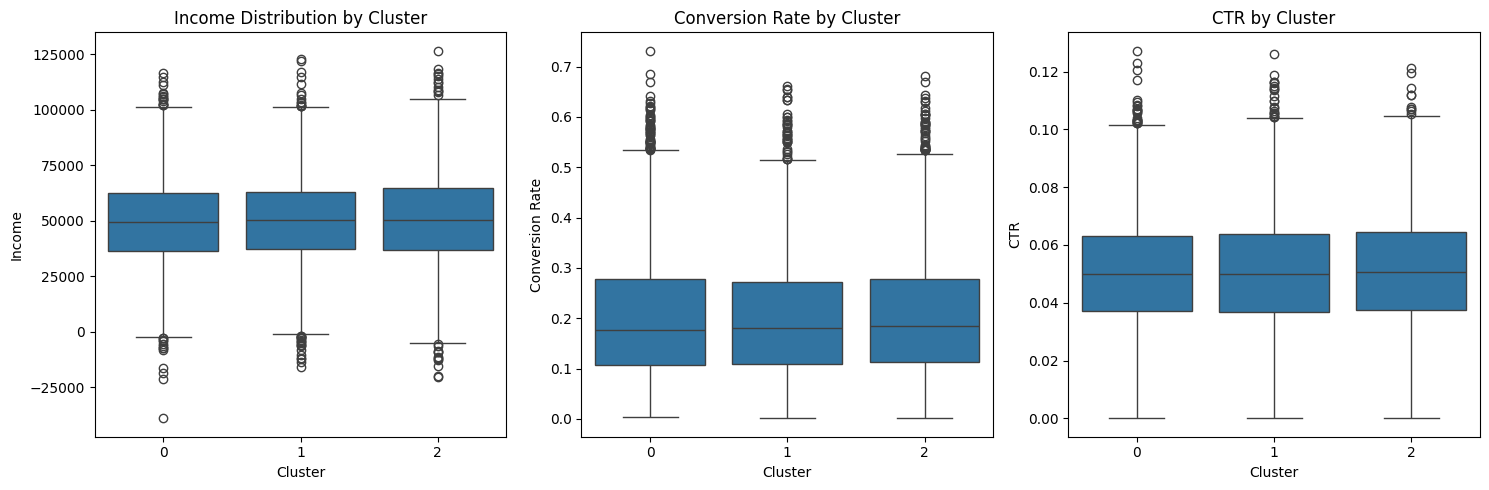

In [13]:
# Step 3: Visualize key feature distributions per cluster using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size and style for clarity
plt.figure(figsize=(15, 5))

# Boxplot for Income by Cluster
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Income', data=df)
plt.title('Income Distribution by Cluster')

# Boxplot for Conversion Rate by Cluster
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Conversion Rate', data=df)
plt.title('Conversion Rate by Cluster')

# Boxplot for CTR by Cluster
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='CTR', data=df)
plt.title('CTR by Cluster')

plt.tight_layout()
plt.show()

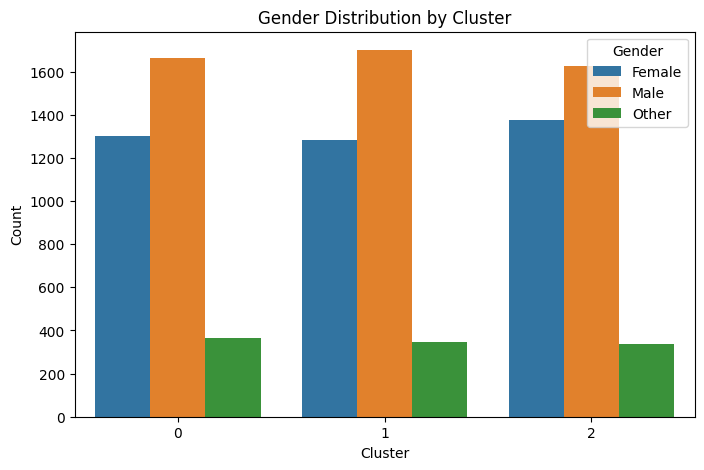

In [15]:
# Step 4: Categorical features - for example, count of users by Gender in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Gender', data=df)
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [16]:
# Step 1: Summarize key insights from clusters
print("Cluster Summary:")
print(cluster_summary)

# Step 2: Generate actionable insights
# Example: Identify the cluster with the highest Conversion Rate
highest_conversion_cluster = cluster_summary['Conversion Rate'].idxmax()
print(f"\nCluster {highest_conversion_cluster} has the highest average Conversion Rate.")

# Example: Identify the cluster with the highest CTR
highest_ctr_cluster = cluster_summary['CTR'].idxmax()
print(f"Cluster {highest_ctr_cluster} has the highest average CTR.")

# Example: Analyze demographic and behavioral traits of these clusters
print("\nDemographic and Behavioral Traits of High-Performing Clusters:")
print(df[df['Cluster'] == highest_conversion_cluster].describe(include='all'))

# Step 3: Provide recommendations
recommendations = {
    "High Conversion Cluster": f"Focus marketing efforts on Cluster {highest_conversion_cluster} by tailoring ad topics and placements to their preferences.",
    "High CTR Cluster": f"Optimize ad designs and placements for Cluster {highest_ctr_cluster} to maximize engagement."
}

print("\nRecommendations:")
for key, value in recommendations.items():
    print(f"- {key}: {value}")

Cluster Summary:
               Age        Income  Conversion Rate       CTR    Clicks
Cluster                                                              
0        34.124962  49561.388336         0.202371  0.050157  4.985281
1        34.522966  50045.072957         0.199627  0.050405  5.030321
2        34.058084  50631.859111         0.204733  0.050711  5.076048

Cluster 2 has the highest average Conversion Rate.
Cluster 2 has the highest average CTR.

Demographic and Behavioral Traits of High-Performing Clusters:
                Age Gender         Income  Location Ad Type Ad Topic  \
count   3340.000000   3340    3340.000000      3340    3340     3340   
unique          NaN      3            NaN         3       4        6   
top             NaN   Male            NaN  Suburban  Native  Finance   
freq            NaN   1625            NaN      1136     853      576   
mean      34.058084    NaN   50631.859111       NaN     NaN      NaN   
std       14.574680    NaN   20152.393209     